## Import Modules

In [ ]:
print("hello world") 

In [ ]:
pip install tensorflow keras numpy==1.24.3 pandas matplotlib seaborn tqdm scikit-learn ipywidgets

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Load the Dataset

In [9]:
TRAIN_DIR = 'train/train/'
TEST_DIR = 'test/test/'

In [12]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    # Skip hidden files and use proper path joining
    for label in [f for f in os.listdir(directory) if not f.startswith('.')]:
        label_path = os.path.join(directory, label)
        
        # Check if it's a directory
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):  # Using label_path instead of directory+label
                image_path = os.path.join(directory, label, filename)
                image_paths.append(image_path)
                labels.append(label)
            
            print(f"{label} Completed")
    
    return image_paths, labels

In [13]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

happy Completed
sad Completed
fear Completed
surprise Completed
neutral Completed
angry Completed
disgust Completed


,image,label
0,train/train/neutral/Training_93317203.jpg,neutral
1,train/train/sad/Training_16549896.jpg,sad
2,train/train/sad/Training_9131330.jpg,sad
3,train/train/angry/Training_20388702.jpg,angry
4,train/train/surprise/Training_77677898.jpg,surprise


In [15]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

happy Completed
sad Completed
fear Completed
surprise Completed
neutral Completed
angry Completed
disgust Completed


,image,label
0,test/test/happy/PrivateTest_45699463.jpg,happy
1,test/test/happy/PrivateTest_61855708.jpg,happy
2,test/test/happy/PublicTest_53681781.jpg,happy
3,test/test/happy/PrivateTest_52109800.jpg,happy
4,test/test/happy/PublicTest_41104919.jpg,happy


## Exploratory Data Analysis

<Axes: xlabel='count', ylabel='label'>

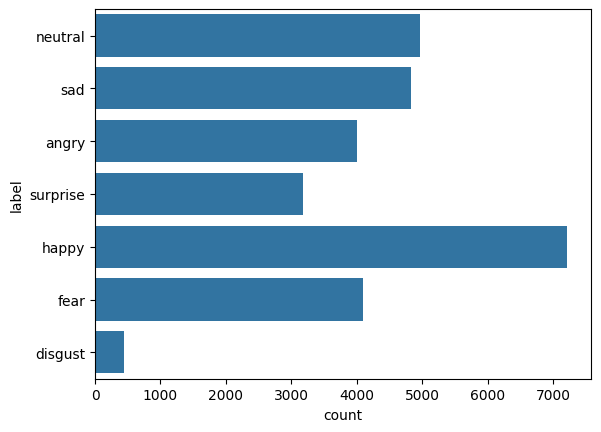

In [16]:
sns.countplot(train['label'])

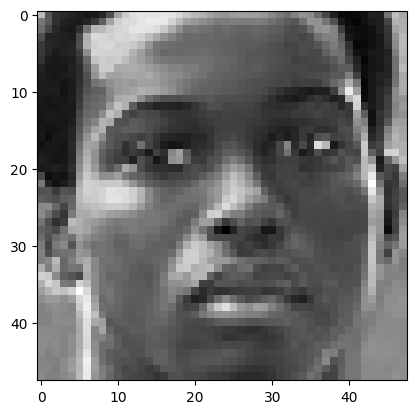

In [17]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

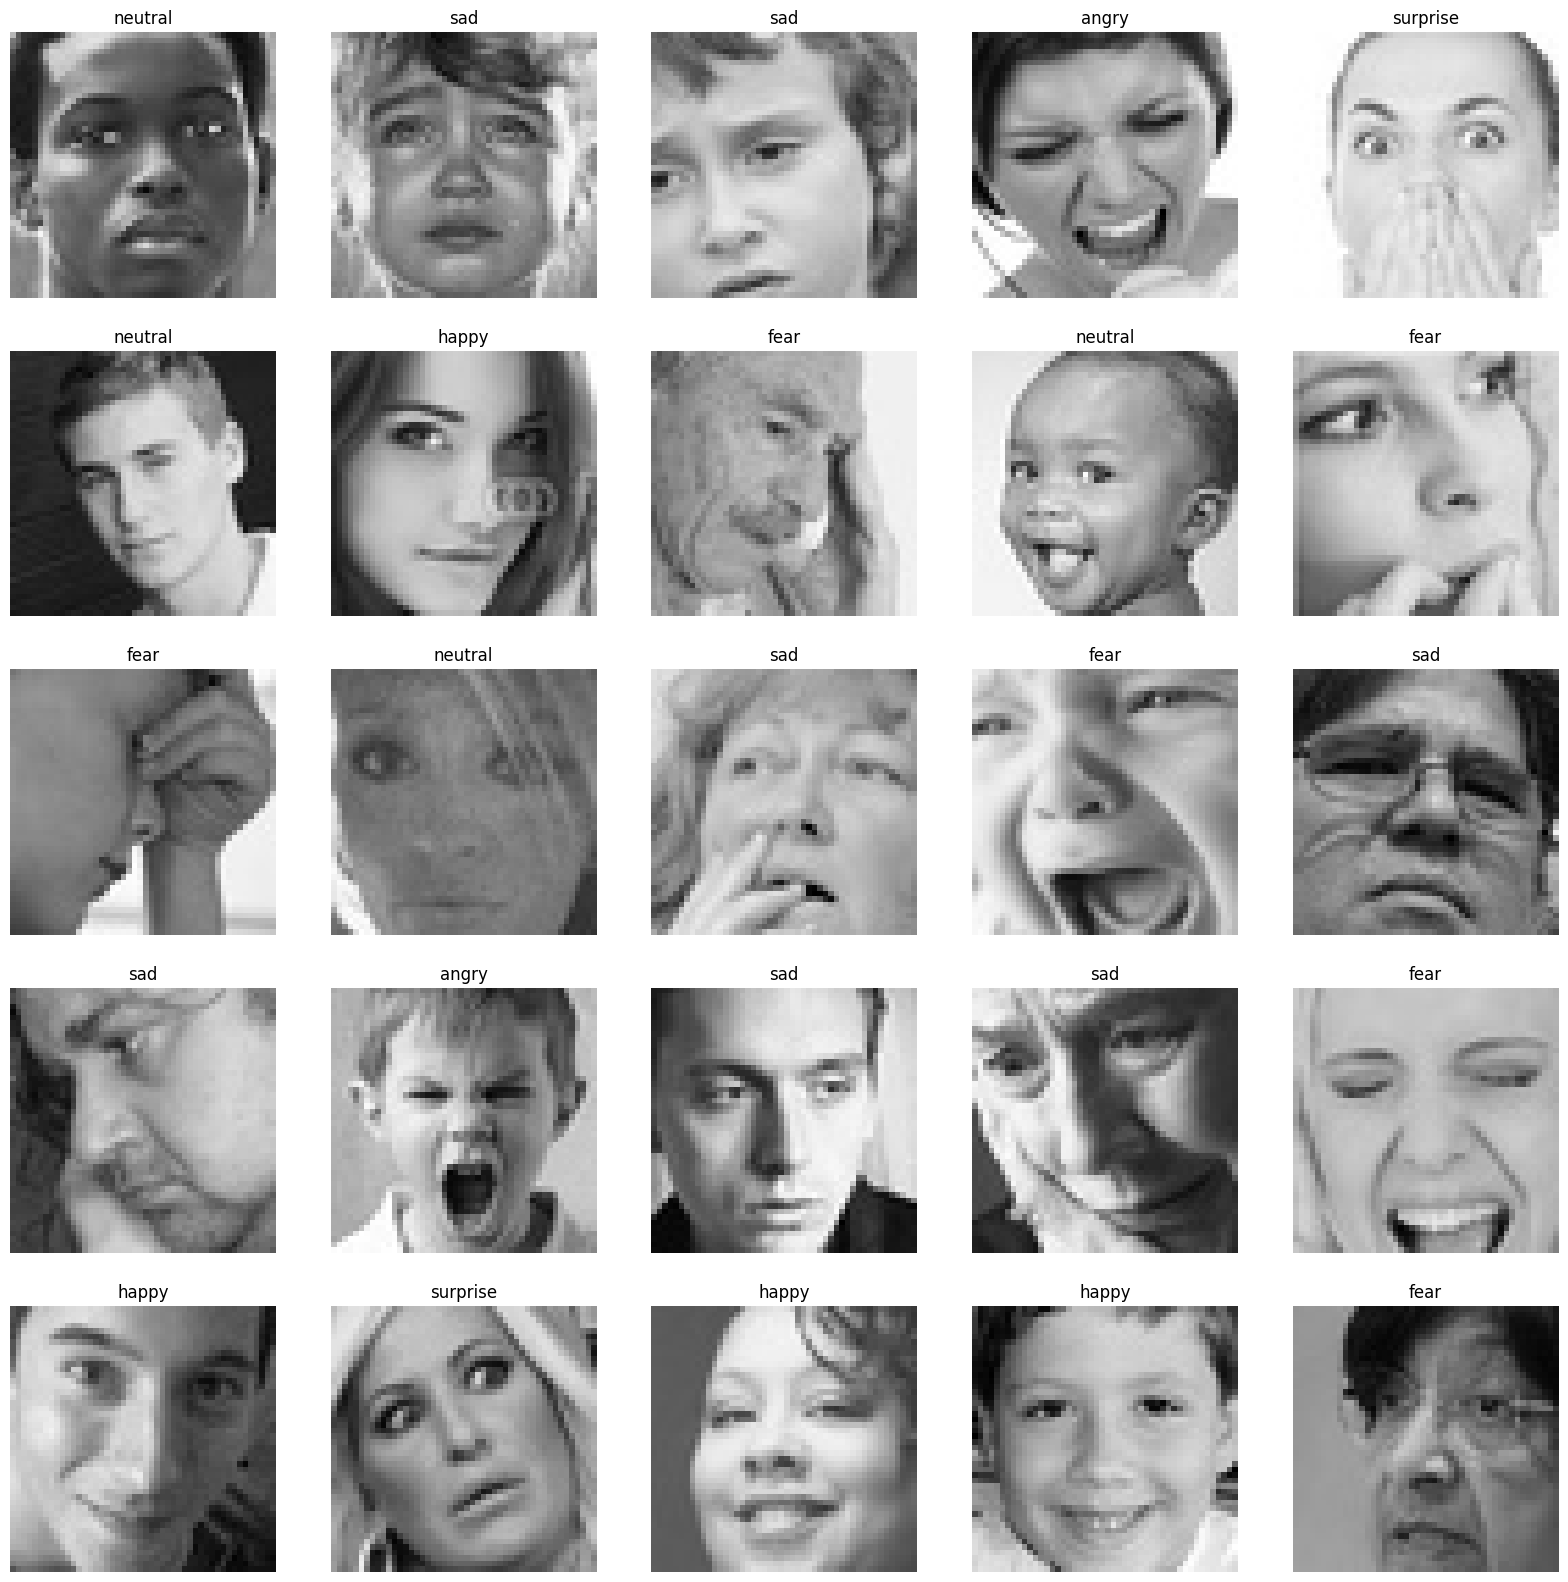

In [18]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

## Feature Extraction

In [21]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [22]:
!pip install ipywidgets



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [23]:
train_features = extract_features(train['image'])

100%|██████████| 28709/28709 [00:05<00:00, 5280.14it/s]


In [24]:
test_features = extract_features(test['image'])

100%|██████████| 7178/7178 [00:01<00:00, 5384.49it/s]


In [25]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [26]:
pip install scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [28]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [29]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0.])

In [30]:
# config
input_shape = (48, 48, 1)
output_class = 7

## Model Creation

In [31]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 194s 857ms/step - accuracy: 0.2348 - loss: 1.8353 - val_accuracy: 0.2565 - val_loss: 1.8012
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 207s 919ms/step - accuracy: 0.2545 - loss: 1.7909 - val_accuracy: 0.3111 - val_loss: 1.7006
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 222s 985ms/step - accuracy: 0.3103 - loss: 1.6928 - val_accuracy: 0.3643 - val_loss: 1.5645
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.3884 - loss: 1.5549 - val_accuracy: 0.4627 - val_loss: 1.3920
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.4447 - loss: 1.4553 - val_accuracy: 0.4857 - val_loss: 1.3515
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.4627 - loss: 1.4016 - val_accuracy: 0.5067 - val_loss: 1.2880
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.4799 - loss: 1.3515 - val_accuracy: 0.5252 - val_loss: 1.2419
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step - accuracy: 0.5009 - loss: 

In [33]:
# Save the full model (architecture + weights)
model.save("modelf1.h5")
print("Model saved successfully!")


Model saved successfully!


## Plot the Results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

## Test with Image Data

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');